# Functions

In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import iqr
import matplotlib.pyplot as plt

In [255]:
def data_summary(df):
    print('Dataset Shape: {}'.format(df.shape))
    print('Num of complete duplicates: {}'.format(df.duplicated().sum()))

    #create a column data type for the dataframe 
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    #change the column name
    summary = summary.reset_index().rename(columns={'index':'Name'})

    #create a 'missing' column to show number of null 
    summary['Missing'] = df.isnull().sum().values

    #create a 'unique' column to show unique values 
    summary['Uniques'] = df.nunique().values

    #create a 'count' column to show all values 
    summary['Count_value'] = df.count().values

    #if the column is numeric, return statistics
    try:
        statis = df.describe().transpose().reset_index().rename(
            columns={'index':'Name'})[['Name','mean','std','25%','50%','75%','max']]
        summary = summary.merge(statis,on = 'Name', how = 'left')

        #if the column is not numeric, do not return anything
    except:
        pass

    #create an index for the df
    summary.index = np.arange(1,len(summary)+1)
    return summary

In [256]:
def barplot(df,x_column,y_column,title, ylabel=None, xlabel=None, hue_column=None):
  sns.barplot(data=df, x=x_column,y=y_column,hue=hue_column)
  # plt.figure(figsize=(12, 10))
  plt.xticks(rotation=90)
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.show()

In [257]:
def time_multiples(df, date_column, measure_column, category, list, measure, title, ylabel=None):
  """
    Generate a line plot for multiple measures over time.

    Parameters:
        - df: DataFrame containing the data
        - date_column: Name of the column with the date information
        - measure_column: Name of the column used to measure the data
        - measure: Type of measure to apply (e.g., 'count', 'sum', 'mean')
        - title: Title of the plot
    """

  # # Get unique values from the measure_column
  # measure_values = df[measure_column].unique()
  # list= df.measure_column.values.tolist()

  # Create an empty DataFrame with the desired columns
  aggregate_data = pd.DataFrame(columns=[date_column])
  # aggregate_data = pd.DataFrame(columns=['date','measure'])


  # Iterate through each measure value
  for value in range(len(list)):
      # Filter the data for the current measure value
      value_data = df[df[category] == list[value]]

      # Group by date_column and calculate the desired measure
      value_counts = value_data.groupby(date_column)[measure_column].agg(measure).reset_index(name=list[value])

      # Merge the counts for the current measure value into the aggregate DataFrame
      aggregate_data = pd.merge(aggregate_data, value_counts, on=date_column, how='outer')

  # Set the 'm_y_purchase' column as the index
  aggregate_data.set_index(date_column, inplace=True)
  aggregate_data.sort_index(inplace=True)

  # Create the line plot
  plt.figure(figsize=(12, 6))
  for category in aggregate_data.columns:
      plt.plot(aggregate_data.index, aggregate_data[category], label=category)

  plt.legend()
  plt.xticks(rotation=90)
  plt.title(title)
  plt.ylabel(ylabel)
  plt.show()

In [258]:
def lineplot(df, x_column, y_column, title, ylabel=None):
  sns.lineplot(data=df, x=x_column, y=y_column, marker='.')
  # plt.figure(figsize=(12, 15))
  plt.legend()
  plt.xticks(rotation=90)
  plt.title(title)
  plt.ylabel(ylabel)
  plt.show()

In [259]:

def bar_multiple_category(df, index_column, bar_column, measure_column, measure, title, ylabel=None):


    ''' 
      #data required: 
    - index_column: (category_column) Name of the column with the category information, each category has separate bars (i.e. state name)
    - bar_column: (date_column) Name of column used to draw bars for each category (i.e. month column, each state has different bars to show the trend in months)
    - measure_column: Name of the column with the count information (i.e. product_id used to count product sold per month)
    - measure: Type of measure to apply (e.g., 'count', 'sum', 'mean')
    '''

    df_group = df.groupby([index_column, bar_column])[measure_column].agg(measure).unstack()

    # Create the bar chart
    plt.figure(figsize=(12, 6))

    # Set the positions for the bars
    positions = range(len(df_group.index))
    width = 0.8 / len(df_group.columns)

    # Plot the bars for each year within each state
    for i, bar in enumerate(df_group.columns):
        plt.bar([p + width * i for p in positions], df_group[bar], width=width, label=bar)

    # Set the x-axis labels
    plt.xticks([p + (width * len(df_group.columns) / 2) for p in positions], df_group.index, rotation=90)

    # #place the legend outside the chart
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    #set title & ylabel
    plt.title(title)
    plt.ylabel(ylabel)
  

# Import data

## Order
*given delivered status, examine average time between created & delivered (dive into each duration between each status if necessary), analze cancelled order (if necessary) *

In [260]:
order=pd.read_csv('olist_orders_dataset.csv')
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [261]:
#data overview
data_summary(order)

Dataset Shape: (99441, 8)
Num of complete duplicates: 0


,Name,dtypes,Missing,Uniques,Count_value
1,order_id,object,0,99441,99441
2,customer_id,object,0,99441,99441
3,order_status,object,0,8,99441
4,order_purchase_timestamp,object,0,98875,99441
5,order_approved_at,object,160,90733,99281
6,order_delivered_carrier_date,object,1783,81018,97658
7,order_delivered_customer_date,object,2965,95664,96476
8,order_estimated_delivery_date,object,0,459,99441




*   each order is associated to a unique customer
*   8 order status: *need further analysis
*   order_purchase_timestamp & order_estimated_delivery_date has non-null value, 3 other time columns have null: *need further analysis
*   time columns need to be converted to datetime data type

In [262]:
#Convert date columns
order['order_purchase_timestamp']=pd.to_datetime(order.order_purchase_timestamp)
order['order_approved_at']=pd.to_datetime(order.order_approved_at)
order['order_delivered_carrier_date']=pd.to_datetime(order.order_delivered_carrier_date)
order['order_delivered_customer_date']=pd.to_datetime(order.order_delivered_customer_date)
order['order_estimated_delivery_date']=pd.to_datetime(order.order_estimated_delivery_date)

order.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [263]:
# check duplicated order_id
print(order[order.duplicated(subset='order_id',keep=False)].shape)

# check duplicated customer_id
print(order[order.duplicated(subset='customer_id',keep=False)].shape)

(0, 8)
(0, 8)




*   1 order have the latest order status, instead of 1 order have many rows with different status
*   each customer only buys once


In [264]:
# check text error for order status
order.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64



*   No text error found, with 8 unique & consistent order status



---------

### analyze order status

In [265]:
print('1st day of recorded order:', order.order_purchase_timestamp.min())
print('last day of recordedd order:', order.order_purchase_timestamp.max())

1st day of recorded order: 2016-09-04 21:15:19
last day of recordedd order: 2018-10-17 17:30:18


In [266]:
order[order.order_status=='created']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaT,NaT,NaT,2018-01-11
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaT,NaT,NaT,2018-03-07
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaT,NaT,NaT,2017-12-12
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaT,NaT,NaT,2018-01-08
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaT,NaT,NaT,2017-12-01




*   only 5 orders created but not yet approved



In [267]:
order[order.order_status=='approved']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44897,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaT,NaT,2017-03-01
88457,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,NaT,NaT,2017-05-22




*   only 2 orders approved & not yet reach the delivery stage



In [268]:
total_order= order.shape[0]

#filter order 'processing'
processing=order[order.order_status=='processing']

print('df shape:', processing.shape[0])
print('% of total order:', processing.shape[0] / total_order * 100)
print("")
print(processing.isna().sum())

df shape: 301
% of total order: 0.3026920485514023

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     301
order_delivered_customer_date    301
order_estimated_delivery_date      0
dtype: int64


*   0.3% orders after approved then processed, not yet reach delivered in 3 years

In [269]:
#filter order 'invoiced'
invoiced=order[order.order_status=='invoiced']

print('df shape:', invoiced.shape[0])
print('% of total order:', invoiced.shape[0] / total_order * 100)
print("")
print(invoiced.isna().sum())

df shape: 314
% of total order: 0.3157651270602669

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     314
order_delivered_customer_date    314
order_estimated_delivery_date      0
dtype: int64


*   0.3% orders invoiced not yet delivered in 3 years

In [270]:
#filter order 'invoiced'
shipped=order[order.order_status=='shipped']

print('df shape:', shipped.shape[0])
print('% of total order:', shipped.shape[0] / total_order * 100)
print("")
print(shipped.isna().sum())

df shape: 1107
% of total order: 1.1132229161010045

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1107
order_estimated_delivery_date       0
dtype: int64




1.1% orders shipped not yet delivered \
**1 in every 100 orders was not delivered by the carrier
given the order total of 3 years, the figure is subtle**



---



In [271]:
#filter order 'canceled'
canceled=order[order.order_status=='canceled']

print('df shape:', canceled.shape[0])
print('% of total order:', canceled.shape[0] / total_order * 100)
print("")
print(canceled.isna().sum())

order[(order.order_status=='canceled') & (order.order_approved_at.isna()) & (order.order_delivered_carrier_date.isna())
      & (order.order_delivered_customer_date.isna())].head(3)

df shape: 625
% of total order: 0.6285133898492574

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                141
order_delivered_carrier_date     550
order_delivered_customer_date    619
order_estimated_delivery_date      0
dtype: int64


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10




1.   null order_approved_at: order not yet approved then canceled
2.   null order_delivered_carrier_date: order approved then canceled (can be also null for order_approved_at)
3.   null order_delivered_customer_date: order reached the carrier then canceled



In [272]:
#order not approved then canceled
not_approve_cancel= order[(order.order_status=='canceled') & (order.order_approved_at.isna()) & (order.order_delivered_carrier_date.isna())
        & (order.order_delivered_customer_date.isna())].shape[0]

print(
  'Number of order not yet approved then canceled: ',not_approve_cancel
)
print(
    '% of Total order: ', round(not_approve_cancel / total_order * 100, 3)
)

Number of order not yet approved then canceled:  141
% of Total order:  0.142


In [273]:
# order approved then canceled
approve_cancel= order[(order.order_status=='canceled') & (~order.order_approved_at.isna()) & (order.order_delivered_carrier_date.isna())
      & (order.order_delivered_customer_date.isna())].shape[0]

print(
  'Number of order approved then canceled: ',approve_cancel
)
print(
    '% of Total order: ', round(approve_cancel / total_order * 100, 3)
)
# 409 + 141 = 550

Number of order approved then canceled:  409
% of Total order:  0.411


In [274]:
# order reached the carrier then canceled
carrier_cancel= order[(order.order_status=='canceled') & (~order.order_approved_at.isna()) & (~order.order_delivered_carrier_date.isna())
      & (order.order_delivered_customer_date.isna())].shape[0]

print(
  'Number of order reached the carrier then canceled: ',carrier_cancel
)
print(
    '% of Total order: ', round(carrier_cancel / total_order * 100, 3)
)
# 550 + 69 = 619

Number of order reached the carrier then canceled:  69
% of Total order:  0.069




**a small portion of orders was canceled for the 3 stages mentioned above**


---

In [275]:
# null order_approved_at
order[order.order_approved_at.isna()].order_status.value_counts()

canceled     141
delivered     14
created        5
Name: order_status, dtype: int64



*   order_status = canceled: sensible(canceled before approved)
*   order_status = delivered: insensible(already delivered but null approved status)
*   order_status= created (5 orders created have no data)



In [276]:
# null order_delivered_carrier_date:
order[order.order_delivered_carrier_date.isna()].order_status.value_counts()

unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: order_status, dtype: int64



*   order_status = unavailable, canceled, invoiced, processing: sensible (order not reach deliver stage->null deliver date)
*   order_status = delivered: insensible (already delivered but null delivered status), created (5 order created have no data), approved (no idea)
*   order_status = approved (already delivered but null approved status)
*   order_status = created (5 order created have no data)



In [277]:
# null order_delivered_carrier_date:
order[order.order_delivered_customer_date.isna()].order_status.value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

- order_status = shipped: sensible (shipped to carrier, not yet delivered to customer)
- order_status = unavailable, canceled, invoiced, processing, created, approved, delivered: insensible

**few insensible null data-> likely data collection error**





---



In [278]:
print(order.order_purchase_timestamp.min())
print(order[~order.order_approved_at.isna()].order_approved_at.min())
print(order[~order.order_delivered_carrier_date.isna()].order_delivered_carrier_date.min())
print(order[~order.order_delivered_customer_date.isna()].order_delivered_customer_date.min())

print('')
print(order.order_purchase_timestamp.max())
print(order[~order.order_approved_at.isna()].order_approved_at.max())
print(order[~order.order_delivered_carrier_date.isna()].order_delivered_carrier_date.max())
print(order[~order.order_delivered_customer_date.isna()].order_delivered_customer_date.max())

2016-09-04 21:15:19
2016-09-15 12:16:38
2016-10-08 10:34:01
2016-10-11 13:46:32

2018-10-17 17:30:18
2018-09-03 17:40:06
2018-09-11 19:48:28
2018-10-17 13:22:46


- given min all date columns are lower than order_approve & max all columns are lower than order_delivered, no out of range error

## Payment
*Average order value, GMV trend (exclude cancelled orders)*

In [279]:
payment=pd.read_csv('olist_order_payments_dataset.csv')
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [280]:
payment[payment.duplicated(subset='order_id',keep=False)].sort_values(['order_id','payment_sequential']).head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
89575,0016dfedd97fc2950e388d2971d718c7,1,credit_card,5,52.63
80856,0016dfedd97fc2950e388d2971d718c7,2,voucher,1,17.92
20036,002f19a65a2ddd70a090297872e6d64e,1,voucher,1,44.11
98894,002f19a65a2ddd70a090297872e6d64e,2,voucher,1,33.18
10244,0071ee2429bc1efdc43aa3e073a5290e,1,voucher,1,100.00
30155,0071ee2429bc1efdc43aa3e073a5290e,2,voucher,1,92.44
16053,009ac365164f8e06f59d18a08045f6c4,1,credit_card,1,0.88
16459,009ac365164f8e06f59d18a08045f6c4,2,voucher,1,4.50
73837,009ac365164f8e06f59d18a08045f6c4,3,voucher,1,8.25
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45


* 1 order is transacted with multiple methods

In [281]:
data_summary(payment)

Dataset Shape: (103886, 5)
Num of complete duplicates: 0


,Name,dtypes,Missing,Uniques,Count_value,mean,std,25%,50%,75%,max
1,order_id,object,0,99440,103886,NaN,NaN,NaN,NaN,NaN,NaN
2,payment_sequential,int64,0,29,103886,1.092679,0.706584,1.00,1.0,1.0000,29.00
3,payment_type,object,0,5,103886,NaN,NaN,NaN,NaN,NaN,NaN
4,payment_installments,int64,0,24,103886,2.853349,2.687051,1.00,1.0,4.0000,24.00
5,payment_value,float64,0,29077,103886,154.100380,217.494064,56.79,100.0,171.8375,13664.08


* each order is recorded with a payment method
* 1 order can apply up to 29 different methods
* 1 order can apply up to 24 installments

In [282]:
payment.payment_type.value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

* no category error; boleto: cash

In [283]:
print(payment[payment.duplicated(subset='order_id',keep=False)].shape)

(7407, 5)


* no complete duplicates, some orders have duplicates on order id

<Axes: xlabel='payment_value', ylabel='Proportion'>

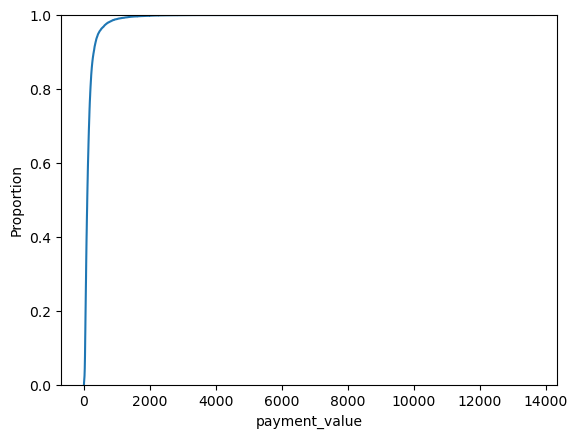

In [284]:
sns.ecdfplot(data=payment,x='payment_value')

* 80% of orders are purchased below 1000 though few is recorded with extremely high value
* most customers bought products with low value on the e-commerce site 

## Item
*best-performing product category, quantity*

In [285]:
item=pd.read_csv('olist_order_items_dataset.csv')
item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [286]:
# no null & data type error, no complete duplicates
data_summary(item)

Dataset Shape: (112650, 7)
Num of complete duplicates: 0


,Name,dtypes,Missing,Uniques,Count_value,mean,std,25%,50%,75%,max
1,order_id,object,0,98666,112650,NaN,NaN,NaN,NaN,NaN,NaN
2,order_item_id,int64,0,21,112650,1.197834,0.705124,1.00,1.00,1.00,21.00
3,product_id,object,0,32951,112650,NaN,NaN,NaN,NaN,NaN,NaN
4,seller_id,object,0,3095,112650,NaN,NaN,NaN,NaN,NaN,NaN
5,shipping_limit_date,object,0,93318,112650,NaN,NaN,NaN,NaN,NaN,NaN
6,price,float64,0,5968,112650,120.653739,183.633928,39.90,74.99,134.90,6735.00
7,freight_value,float64,0,6999,112650,19.990320,15.806405,13.08,16.26,21.15,409.68


* 1 order consists of many items
* 75% of items are sold with the price < 135, though the maximum price for a product is 6735

In [287]:
item[item.duplicated(subset='order_id',keep=False)].head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
42,001ab0a7578dd66cd4b0a71f5b6e1e41,1,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
48,001d8f0e34a38c37f7dba2a37d4eba8b,1,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78
49,001d8f0e34a38c37f7dba2a37d4eba8b,2,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78


* order_item_id indicates the order of product in 1 order

In [288]:
# 1 order can have 1 product with quantity ranging from 1 to 21
item.order_item_id.value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

Text(0.5, 1.0, 'Proportion of average number of product per order in 2017 & 2018')

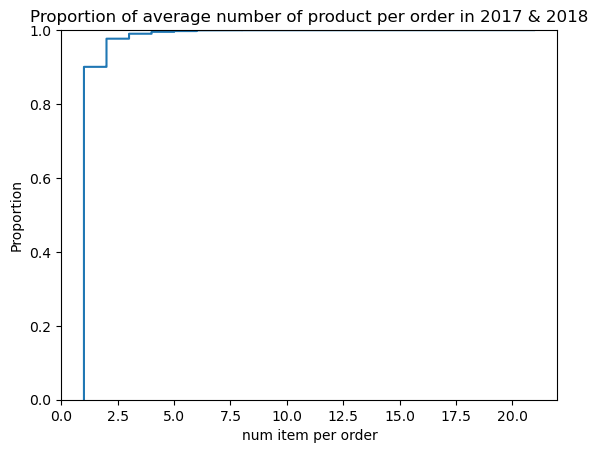

In [289]:
#num of item per order
num_item_order= item.groupby('order_id')['order_item_id'].count().reset_index()

sns.ecdfplot(data=num_item_order, x='order_item_id')
plt.xlabel('num item per order')
plt.title('Proportion of average number of product per order in 2017 & 2018')

* 90% orders were purchased with < 2.5 products

Text(0.5, 1.0, 'Proportion of num product sold with corresponding price in 2017 & 2018')

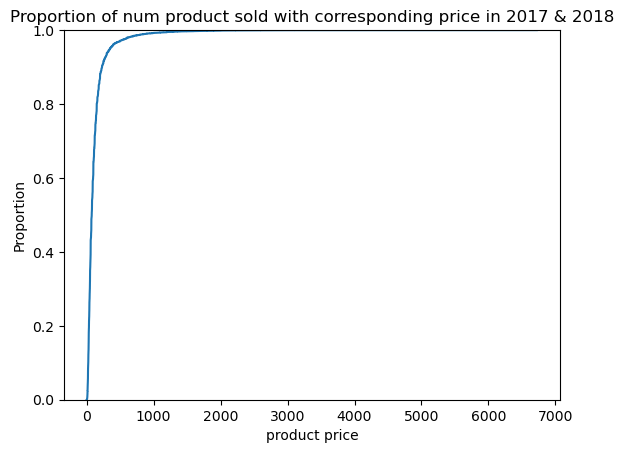

In [290]:
sns.ecdfplot(item, x='price')

plt.xlabel('product price')
plt.title('Proportion of num product sold with corresponding price in 2017 & 2018')

Text(0.5, 1.0, 'Unique product price')

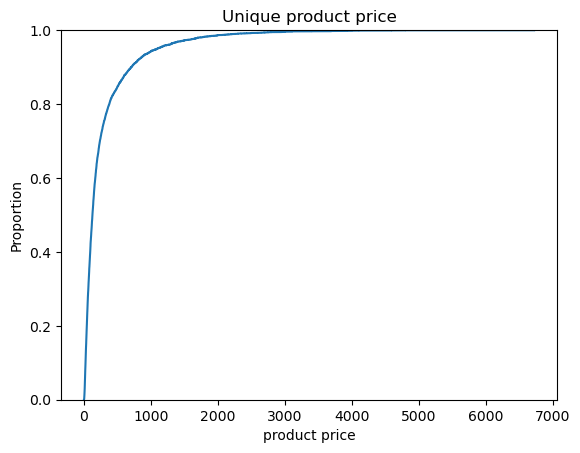

In [291]:
item_unique_price= item.price.unique()

sns.ecdfplot(item_unique_price)

plt.xlabel('product price')
plt.title('Unique product price')

In [292]:
#num products with price between 500 & 1000
len(item.query("500 < price < 1000") )

2370

-------

### compare value 'item' table with that of 'payment'

In [293]:
#count products sold per order
num_product=item.groupby('order_id')['product_id'].nunique()

#filter orders with num products > 1
num_product_higher_1=num_product[num_product.values>1]

#filter 1 order to examine
item[item.order_id.isin(num_product_higher_1.index)].query("order_item_id==4").head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
299,00bcee890eba57a9767c7b5ca12d3a1b,4,55939df5d8d2b853fbc532bf8a00dc32,3bb548e3cb7f70f28e3f11ee9dce0e59,2017-07-26 21:05:07,165.5,15.8


In [294]:
test=item.query("order_id=='00bcee890eba57a9767c7b5ca12d3a1b'").assign(value=lambda x: x.price + x.freight_value)

print('order value sum:', test.value.sum())
test

order value sum: 772.5


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,value
296,00bcee890eba57a9767c7b5ca12d3a1b,1,6c90c0f6c2d89eb816b9e205b9d6a36a,3bb548e3cb7f70f28e3f11ee9dce0e59,2017-07-26 21:05:07,165.50,15.80,181.3
297,00bcee890eba57a9767c7b5ca12d3a1b,2,b7d94dc0640c7025dc8e3b46b52d8239,9c0e69c7bf2619675bbadf47b43f655a,2017-07-26 21:05:07,175.91,52.69,228.6
298,00bcee890eba57a9767c7b5ca12d3a1b,3,d143bf43abb18593fa8ed20cc990ae84,3bb548e3cb7f70f28e3f11ee9dce0e59,2017-07-26 21:05:07,165.50,15.80,181.3
299,00bcee890eba57a9767c7b5ca12d3a1b,4,55939df5d8d2b853fbc532bf8a00dc32,3bb548e3cb7f70f28e3f11ee9dce0e59,2017-07-26 21:05:07,165.50,15.80,181.3


In [295]:
# order value = price of each product row * freight value of each product row
payment.query("order_id=='00bcee890eba57a9767c7b5ca12d3a1b'")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
10741,00bcee890eba57a9767c7b5ca12d3a1b,1,credit_card,10,772.5


* value in 'payment' = sum(price + freight_value) in 'item'

## Item group

In [296]:
#create a df that groups identical product_id 

#'num_sold' column: product quantity of a duplicated product in an order
item_group= item.groupby(['order_id','product_id','price']).agg({'order_item_id':'count'}).reset_index().rename(columns={'order_item_id':'num_sold'})

#create 'order_value' column that measures the value of each product
item_group['order_value']= item_group.price * item_group.num_sold

item_group.head(1)

,order_id,product_id,price,num_sold,order_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,1,58.9


----

## Product
*matched with item to find category*

In [297]:
product=pd.read_csv('olist_products_dataset.csv')
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [298]:
data_summary(product)

Dataset Shape: (32951, 9)
Num of complete duplicates: 0


,Name,dtypes,Missing,Uniques,Count_value,mean,std,25%,50%,75%,max
1,product_id,object,0,32951,32951,NaN,NaN,NaN,NaN,NaN,NaN
2,product_category_name,object,610,73,32341,NaN,NaN,NaN,NaN,NaN,NaN
3,product_name_lenght,float64,610,66,32341,48.476949,10.245741,42.0,51.0,57.0,76.0
4,product_description_lenght,float64,610,2960,32341,771.495285,635.115225,339.0,595.0,972.0,3992.0
5,product_photos_qty,float64,610,19,32341,2.188986,1.736766,1.0,1.0,3.0,20.0
6,product_weight_g,float64,2,2204,32949,2276.472488,4282.038731,300.0,700.0,1900.0,40425.0
7,product_length_cm,float64,2,99,32949,30.815078,16.914458,18.0,25.0,38.0,105.0
8,product_height_cm,float64,2,102,32949,16.937661,13.637554,8.0,13.0,21.0,105.0
9,product_width_cm,float64,2,95,32949,23.196728,12.079047,15.0,20.0,30.0,118.0


In [299]:
# missing product category
product[product.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [300]:
#no duplicates
product[product.duplicated(keep=False)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


## Category
*matched with product to know english category*

In [301]:
category=pd.read_csv('product_category_name_translation.csv')
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [302]:
data_summary(category)

Dataset Shape: (71, 2)
Num of complete duplicates: 0


,Name,dtypes,Missing,Uniques,Count_value
1,product_category_name,object,0,71,71
2,product_category_name_english,object,0,71,71


## Review
*find low review score*

In [303]:
review=pd.read_csv('olist_order_reviews_dataset.csv')
review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [304]:
data_summary(review)

Dataset Shape: (100000, 7)
Num of complete duplicates: 0


,Name,dtypes,Missing,Uniques,Count_value,mean,std,25%,50%,75%,max
1,review_id,object,0,99173,100000,NaN,NaN,NaN,NaN,NaN,NaN
2,order_id,object,0,99441,100000,NaN,NaN,NaN,NaN,NaN,NaN
3,review_score,int64,0,5,100000,4.07089,1.359663,4.0,5.0,5.0,5.0
4,review_comment_title,object,88285,4600,11715,NaN,NaN,NaN,NaN,NaN,NaN
5,review_comment_message,object,58247,36921,41753,NaN,NaN,NaN,NaN,NaN,NaN
6,review_creation_date,object,0,637,100000,NaN,NaN,NaN,NaN,NaN,NaN
7,review_answer_timestamp,object,0,99010,100000,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
# 1 order have multiple comments
review[review.duplicated(subset='order_id',keep=False)].sort_values('order_id')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
25802,89a02c45c340aeeb1354a24e7d4b2c1e,0035246a40f520710769010f752e7507,5,NaN,NaN,2017-08-29 00:00:00,2017-08-30 01:59:12
22585,2a74b0559eb58fc1ff842ecc999594cb,0035246a40f520710769010f752e7507,5,NaN,Estou acostumada a comprar produtos pelo barat...,2017-08-25 00:00:00,2017-08-29 21:45:57
22946,ab30810c29da5da8045216f0f62652a2,013056cfe49763c6f66bda03396c5ee3,5,NaN,NaN,2018-02-22 00:00:00,2018-02-23 12:12:30
69191,73413b847f63e02bc752b364f6d05ee9,013056cfe49763c6f66bda03396c5ee3,4,NaN,NaN,2018-03-04 00:00:00,2018-03-05 17:02:00
83893,d8e8c42271c8fb67b9dad95d98c8ff80,0176a6846bcb3b0d3aa3116a9a768597,5,NaN,NaN,2017-12-30 00:00:00,2018-01-02 10:54:47
...,...,...,...,...,...,...,...
27663,5e78482ee783451be6026e5cf0c72de1,ff763b73e473d03c321bcd5a053316e8,3,NaN,Não sei que haverá acontecido os demais chegaram,2017-11-18 00:00:00,2017-11-18 09:02:48
41665,39de8ad3a1a494fc68cc2d5382f052f4,ff850ba359507b996e8b2fbb26df8d03,5,NaN,Envio rapido... Produto 100%,2017-08-16 00:00:00,2017-08-17 11:56:55
18916,80f25f32c00540d49d57796fb6658535,ff850ba359507b996e8b2fbb26df8d03,5,NaN,"Envio rapido, produto conforme descrito no anu...",2017-08-22 00:00:00,2017-08-25 11:40:22
54388,5476dd0eaee7c4e2725cafb011aa758c,ffaabba06c9d293a3c614e0515ddbabc,3,NaN,NaN,2017-12-20 00:00:00,2017-12-21 13:24:55


## Customer
*most customers in which state, city*

In [306]:
customer=pd.read_csv('olist_customers_dataset.csv')
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [307]:
data_summary(customer)

Dataset Shape: (99441, 5)
Num of complete duplicates: 0


,Name,dtypes,Missing,Uniques,Count_value,mean,std,25%,50%,75%,max
1,customer_id,object,0,99441,99441,NaN,NaN,NaN,NaN,NaN,NaN
2,customer_unique_id,object,0,96096,99441,NaN,NaN,NaN,NaN,NaN,NaN
3,customer_zip_code_prefix,int64,0,14994,99441,35137.474583,29797.938996,11347.0,24416.0,58900.0,99990.0
4,customer_city,object,0,4119,99441,NaN,NaN,NaN,NaN,NaN,NaN
5,customer_state,object,0,27,99441,NaN,NaN,NaN,NaN,NaN,NaN


## Geo
*with long lat, displayed on map*

In [308]:
geo=pd.read_csv('olist_geolocation_dataset.csv')
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## Seller

In [309]:
seller=pd.read_csv('olist_sellers_dataset.csv')
seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [310]:
data_summary(seller)

Dataset Shape: (3095, 4)
Num of complete duplicates: 0


,Name,dtypes,Missing,Uniques,Count_value,mean,std,25%,50%,75%,max
1,seller_id,object,0,3095,3095,NaN,NaN,NaN,NaN,NaN,NaN
2,seller_zip_code_prefix,int64,0,2246,3095,32291.059451,32713.45383,7093.5,14940.0,64552.5,99730.0
3,seller_city,object,0,611,3095,NaN,NaN,NaN,NaN,NaN,NaN
4,seller_state,object,0,23,3095,NaN,NaN,NaN,NaN,NaN,NaN


In [311]:
item.query("order_id=='bfbd0f9bdef84302105ad712db648a6c'")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
84389,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
84390,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
84391,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83


# Analysis

## OVERALL

### GMV BY MONTH

In [312]:
#create a 'month-year' column for order_purchase
order['m_y_purchase']=order['order_purchase_timestamp'].dt.to_period('M')
order['m_y_purchase']=order['m_y_purchase'].astype('str')
order.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
m_y_purchase                             object
dtype: object

In [313]:
#merge order with item_group to calculate GMV
order_itemgroup= order.merge(item_group, how='left', on='order_id')

print(order.shape)
print(item_group.shape)
print('')
data_summary(order_itemgroup)

(99441, 9)
(102425, 5)

Dataset Shape: (103200, 13)
Num of complete duplicates: 0


,Name,dtypes,Missing,Uniques,Count_value,mean,std,25%,50%,75%,max
1,order_id,object,0,99441,103200,NaN,NaN,NaN,NaN,NaN,NaN
2,customer_id,object,0,99441,103200,NaN,NaN,NaN,NaN,NaN,NaN
3,order_status,object,0,8,103200,NaN,NaN,NaN,NaN,NaN,NaN
4,order_purchase_timestamp,datetime64[ns],0,98875,103200,NaN,NaN,NaN,NaN,NaN,NaN
5,order_approved_at,datetime64[ns],160,90733,103040,NaN,NaN,NaN,NaN,NaN,NaN
6,order_delivered_carrier_date,datetime64[ns],1802,81018,101398,NaN,NaN,NaN,NaN,NaN,NaN
7,order_delivered_customer_date,datetime64[ns],3005,95664,100195,NaN,NaN,NaN,NaN,NaN,NaN
8,order_estimated_delivery_date,datetime64[ns],0,459,103200,NaN,NaN,NaN,NaN,NaN,NaN
9,m_y_purchase,object,0,25,103200,NaN,NaN,NaN,NaN,NaN,NaN
10,product_id,object,775,32951,102425,NaN,NaN,NaN,NaN,NaN,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


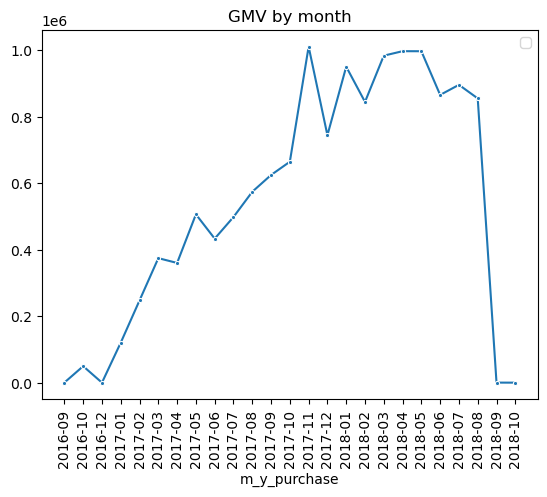

In [314]:
#use product quantity to see the trend
order_itemgroup=order_itemgroup[['order_id', 'customer_id', 'm_y_purchase', 'price', 'num_sold', 'order_value']]

GMV=order_itemgroup.groupby('m_y_purchase')['order_value'].sum().reset_index()

lineplot(GMV, 'm_y_purchase', 'order_value', 'GMV by month')


In [315]:
order=order.query("order_purchase_timestamp >= '2017-01' and order_purchase_timestamp <= '2018-09'")

print('min purchase date:',order.order_purchase_timestamp.max() )
print('max purchase date:',order.order_purchase_timestamp.min() )

#merge order with item_group to calculate GMV
order_itemgroup= order.merge(item_group, how='left', on='order_id')

print(order.shape)
print(item_group.shape)
print('')
data_summary(order_itemgroup)

min purchase date: 2018-08-31 16:13:44
max purchase date: 2017-01-05 11:56:06
(99092, 9)
(102425, 5)

Dataset Shape: (102831, 13)
Num of complete duplicates: 0


,Name,dtypes,Missing,Uniques,Count_value,mean,std,25%,50%,75%,max
1,order_id,object,0,99092,102831,NaN,NaN,NaN,NaN,NaN,NaN
2,customer_id,object,0,99092,102831,NaN,NaN,NaN,NaN,NaN,NaN
3,order_status,object,0,8,102831,NaN,NaN,NaN,NaN,NaN,NaN
4,order_purchase_timestamp,datetime64[ns],0,98526,102831,NaN,NaN,NaN,NaN,NaN,NaN
5,order_approved_at,datetime64[ns],135,90410,102696,NaN,NaN,NaN,NaN,NaN,NaN
6,order_delivered_carrier_date,datetime64[ns],1731,80748,101100,NaN,NaN,NaN,NaN,NaN,NaN
7,order_delivered_customer_date,datetime64[ns],2923,95394,99908,NaN,NaN,NaN,NaN,NaN,NaN
8,order_estimated_delivery_date,datetime64[ns],0,420,102831,NaN,NaN,NaN,NaN,NaN,NaN
9,m_y_purchase,object,0,20,102831,NaN,NaN,NaN,NaN,NaN,NaN
10,product_id,object,739,32787,102092,NaN,NaN,NaN,NaN,NaN,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


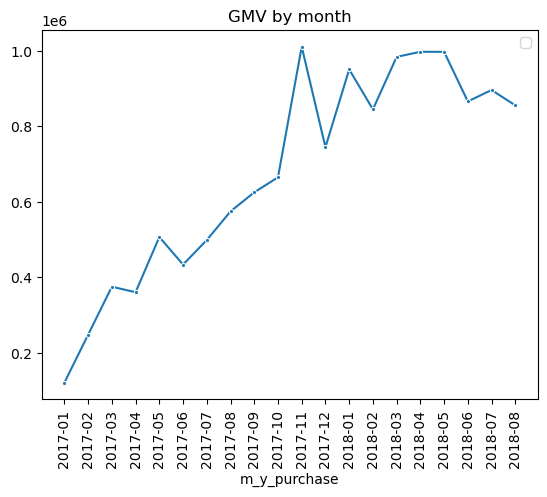

In [316]:
#redraw GMV 

order_itemgroup=order_itemgroup[['order_id', 'customer_id', 'm_y_purchase', 'price', 'num_sold', 'order_value']]
GMV=order_itemgroup.groupby('m_y_purchase')['order_value'].sum().reset_index()

lineplot(GMV, 'm_y_purchase', 'order_value', 'GMV by month')


### TOTAL PRODUCT QUANTITY BY MONTH

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


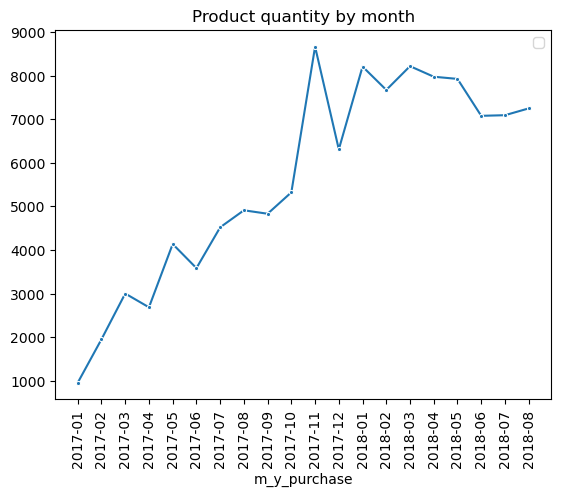

In [317]:
product_quant_trend=order_itemgroup.groupby('m_y_purchase')['num_sold'].sum().reset_index()

lineplot(product_quant_trend, 'm_y_purchase', 'num_sold', 'Product quantity by month')


### AVERAGE PRODUCT PRICE BY MONTH

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


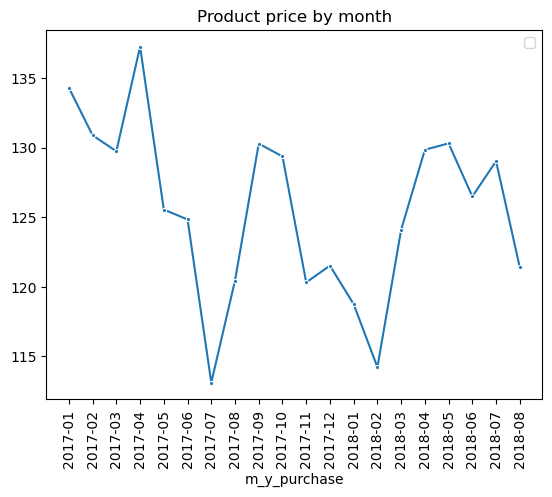

In [318]:
product_price_trend=order_itemgroup.groupby('m_y_purchase')['price'].mean().reset_index()

lineplot(product_price_trend, 'm_y_purchase', 'price', 'Product price by month')


### *ORDER QUANTITY BY MONTH*

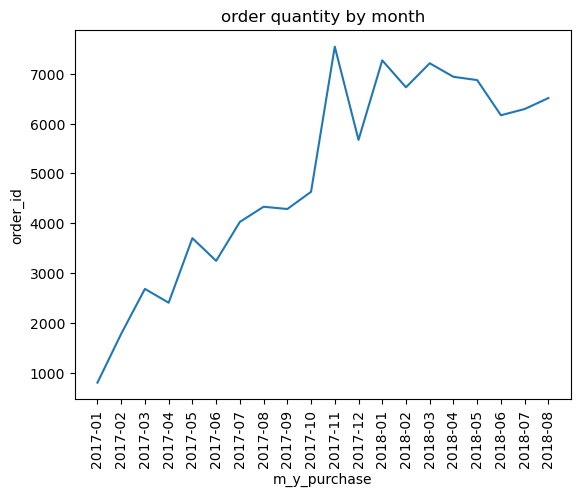

In [319]:
#number of order by month
order_quantity_trend= order.groupby('m_y_purchase')['order_id'].nunique().reset_index()

sns.lineplot(data=order_quantity_trend,x='m_y_purchase',y='order_id')
plt.xticks(rotation=90)
plt.title('order quantity by month')
plt.show()

### *AVG PRODUCT QUANTITY PER ORDER*

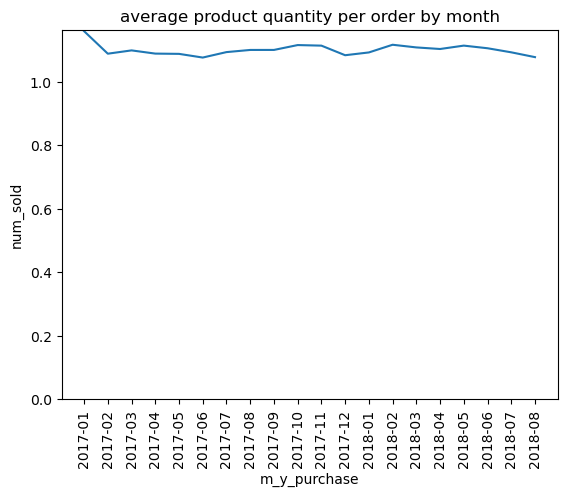

In [320]:
product_quant=order_itemgroup[['order_id','m_y_purchase','num_sold']]

#count avg num of products sold per order
product_quant_order= product_quant.groupby('m_y_purchase')['num_sold'].mean().reset_index()

sns.lineplot(data=product_quant_order,x='m_y_purchase',y='num_sold')
plt.title('average product quantity per order by month')
plt.xticks(rotation=90)
plt.ylim(0)
plt.show()

### *AVG PRODUCT PRICE PER ORDER*

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


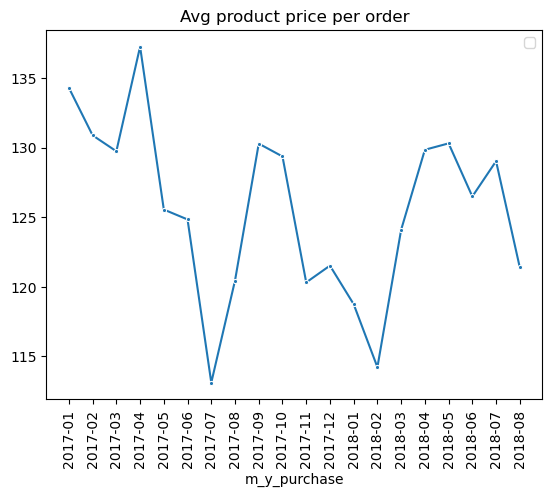

In [321]:
item_price= order_itemgroup[['order_id','m_y_purchase','price']]

#count avg num of products sold per order
item_price_order= item_price.groupby('m_y_purchase')['price'].mean().reset_index()

lineplot(item_price_order, 'm_y_purchase', 'price', 'Avg product price per order')


### AOV

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


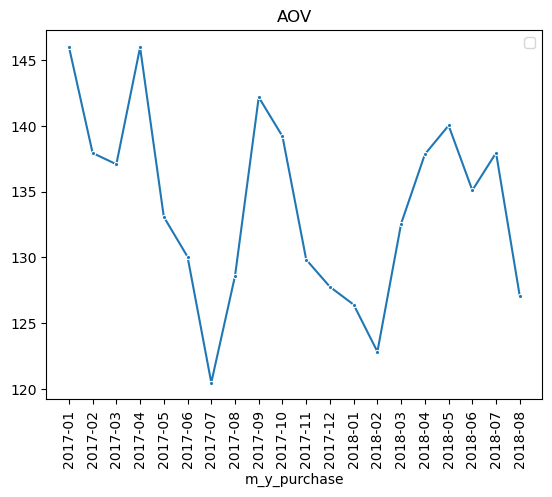

In [322]:
# calculate Average order value per month
AOV=order_itemgroup.groupby('m_y_purchase')['order_value'].mean().reset_index()

lineplot(AOV, 'm_y_purchase', 'order_value', 'AOV')


### *Insights *

Order quanity is the main driver of GMV. Since a declince in order quantity leads to a declince in GMV, we need to identify which product type/area is declining.

## Category trend examination

In [323]:
#merge item with product to show categories names, which is used to merged with 'category' to display english category name

item_pro_cate=item.merge(product, on='product_id', how='left').merge(category, how='left',on='product_category_name')
item_pro_cate=item_pro_cate[['order_id','order_item_id','product_id','shipping_limit_date','price','product_category_name_english']]

data_summary(item_pro_cate)

Dataset Shape: (112650, 6)
Num of complete duplicates: 0


,Name,dtypes,Missing,Uniques,Count_value,mean,std,25%,50%,75%,max
1,order_id,object,0,98666,112650,NaN,NaN,NaN,NaN,NaN,NaN
2,order_item_id,int64,0,21,112650,1.197834,0.705124,1.0,1.00,1.0,21.0
3,product_id,object,0,32951,112650,NaN,NaN,NaN,NaN,NaN,NaN
4,shipping_limit_date,object,0,93318,112650,NaN,NaN,NaN,NaN,NaN,NaN
5,price,float64,0,5968,112650,120.653739,183.633928,39.9,74.99,134.9,6735.0
6,product_category_name_english,object,1627,71,111023,NaN,NaN,NaN,NaN,NaN,NaN


### top 5 categories with the highest product quantity sold


In [324]:

highest_quantity=item_pro_cate.product_category_name_english.value_counts().reset_index().sort_values('product_category_name_english',ascending=False).head()
highest_quantity

,index,product_category_name_english
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827


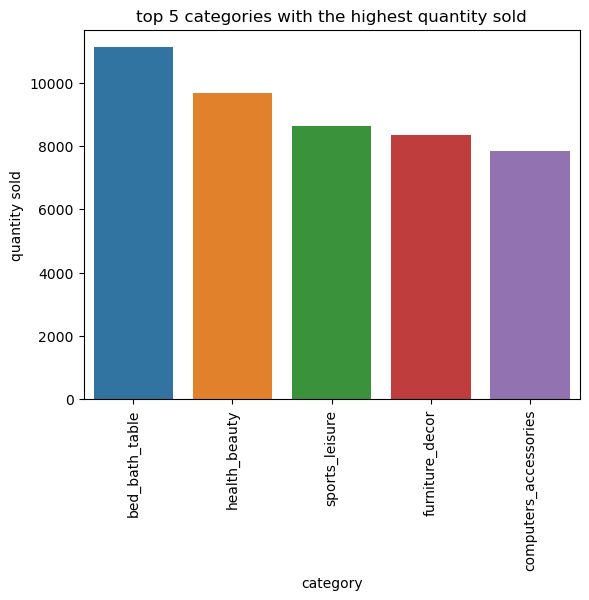

In [325]:
barplot(highest_quantity,'index','product_category_name_english','top 5 categories with the highest quantity sold', 'quantity sold', 'category')

### top 5 categories with the highest price

In [326]:
highest_price=item_pro_cate.groupby('product_category_name_english')['price'].mean().reset_index().sort_values('price',ascending=False).head()
highest_price

,product_category_name_english,price
14,computers,1098.340542
64,small_appliances_home_oven_and_coffee,624.285658
45,home_appliances_2,476.124958
0,agro_industry_and_commerce,342.124858
56,musical_instruments,281.616000


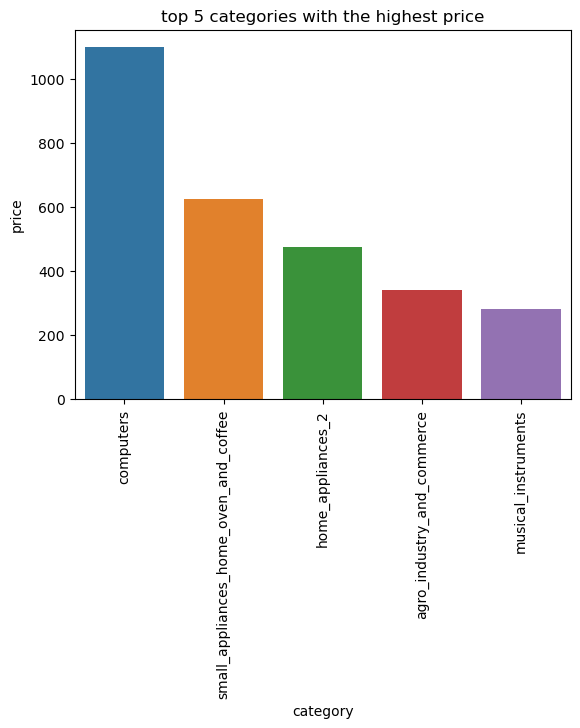

In [327]:
barplot(highest_price, 'product_category_name_english', 'price', 'top 5 categories with the highest price','price', 'category')

In [328]:
print('item_pro_cate shape',item_pro_cate.shape)
print('order shape:',order.shape)
print('')

#merge order with item_pro_cate to display category with purchase date
order_item_pro_cate=order.merge(item_pro_cate, how='left',on='order_id')
data_summary(order_item_pro_cate)

item_pro_cate shape (112650, 6)
order shape: (99092, 9)

Dataset Shape: (113018, 14)
Num of complete duplicates: 0


,Name,dtypes,Missing,Uniques,Count_value,mean,std,25%,50%,75%,max
1,order_id,object,0,99092,113018,NaN,NaN,NaN,NaN,NaN,NaN
2,customer_id,object,0,99092,113018,NaN,NaN,NaN,NaN,NaN,NaN
3,order_status,object,0,8,113018,NaN,NaN,NaN,NaN,NaN,NaN
4,order_purchase_timestamp,datetime64[ns],0,98526,113018,NaN,NaN,NaN,NaN,NaN,NaN
5,order_approved_at,datetime64[ns],136,90410,112882,NaN,NaN,NaN,NaN,NaN,NaN
6,order_delivered_carrier_date,datetime64[ns],1896,80748,111122,NaN,NaN,NaN,NaN,NaN,NaN
7,order_delivered_customer_date,datetime64[ns],3145,95394,109873,NaN,NaN,NaN,NaN,NaN,NaN
8,order_estimated_delivery_date,datetime64[ns],0,420,113018,NaN,NaN,NaN,NaN,NaN,NaN
9,m_y_purchase,object,0,20,113018,NaN,NaN,NaN,NaN,NaN,NaN
10,order_item_id,float64,739,21,112279,1.197615,0.704977,1.0,1.00,1.0,21.0


### Highest price: Num product of each category sold per month

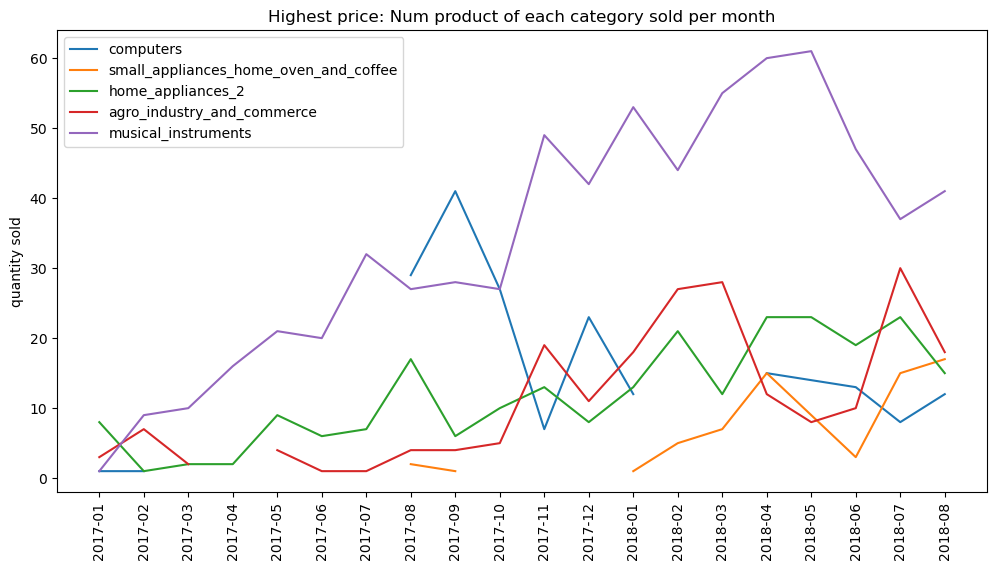

In [329]:
list_price=highest_price.product_category_name_english.values.tolist()
time_multiples(order_item_pro_cate,'m_y_purchase','product_category_name_english','product_category_name_english',list_price,'count','Highest price: Num product of each category sold per month', 'quantity sold')

### Highest quantity: Num product of each category sold per month

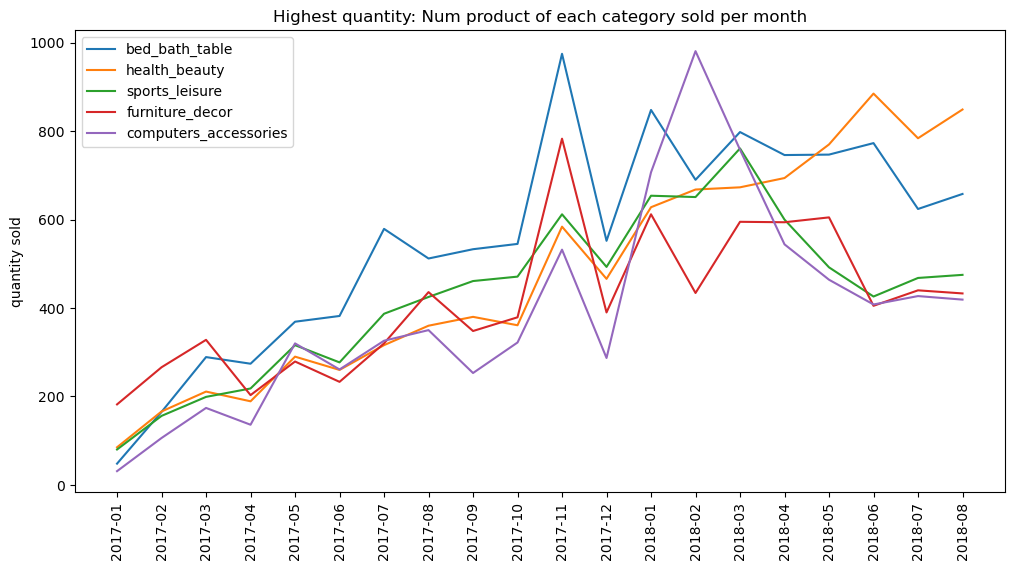

In [330]:
list_quantity=highest_quantity['index'].values.tolist()
time_multiples(order_item_pro_cate,'m_y_purchase','product_category_name_english','product_category_name_english',list_quantity,'count','Highest quantity: Num product of each category sold per month', 'quantity sold')

## Review trend

In [331]:
# since 1 order have multiple comments, group orderid to find mean review score for each order

review_group=review.groupby('order_id')['review_score'].mean().reset_index()

print(review_group.shape)
review_group.head()

(99441, 2)


,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5.0
1,00018f77f2f0320c557190d7a144bdd3,4.0
2,000229ec398224ef6ca0657da4fc703e,5.0
3,00024acbcdf0a6daa1e931b038114c75,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0


In [332]:
#merge order with review
order_review=order.merge(review_group,how='inner',on='order_id')
order_review.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,m_y_purchase,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,4.0


In [333]:
print(order.shape[0])
print("")

data_summary(order_review)

99092

Dataset Shape: (99092, 10)
Num of complete duplicates: 0


,Name,dtypes,Missing,Uniques,Count_value,mean,std,25%,50%,75%,max
1,order_id,object,0,99092,99092,NaN,NaN,NaN,NaN,NaN,NaN
2,customer_id,object,0,99092,99092,NaN,NaN,NaN,NaN,NaN,NaN
3,order_status,object,0,8,99092,NaN,NaN,NaN,NaN,NaN,NaN
4,order_purchase_timestamp,datetime64[ns],0,98526,99092,NaN,NaN,NaN,NaN,NaN,NaN
5,order_approved_at,datetime64[ns],135,90410,98957,NaN,NaN,NaN,NaN,NaN,NaN
6,order_delivered_carrier_date,datetime64[ns],1716,80748,97376,NaN,NaN,NaN,NaN,NaN,NaN
7,order_delivered_customer_date,datetime64[ns],2888,95394,96204,NaN,NaN,NaN,NaN,NaN,NaN
8,order_estimated_delivery_date,datetime64[ns],0,420,99092,NaN,NaN,NaN,NaN,NaN,NaN
9,m_y_purchase,object,0,20,99092,NaN,NaN,NaN,NaN,NaN,NaN
10,review_score,float64,0,11,99092,4.0736,1.356293,4.0,5.0,5.0,5.0


### Overall review score

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


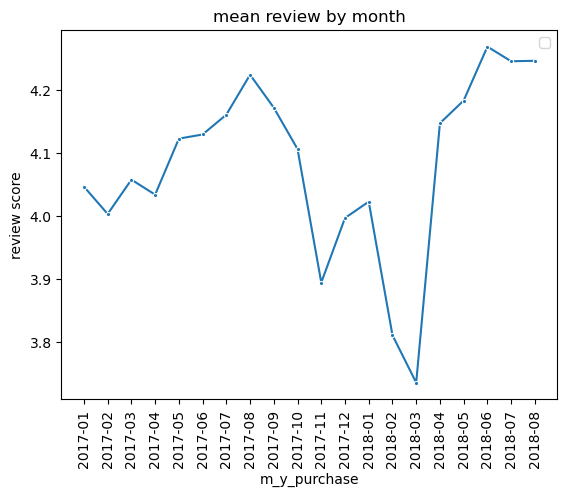

In [334]:
review_trend=order_review.groupby('m_y_purchase')['review_score'].mean().reset_index()

lineplot(review_trend,'m_y_purchase','review_score', 'mean review by month', 'review score')


In [335]:
#merge order_item_pro_cate with review_group to find review score for each category

order_item_pro_cate_review= order_item_pro_cate.merge(review_group, how='left', on='order_id')

data_summary(order_item_pro_cate_review)

Dataset Shape: (113018, 15)
Num of complete duplicates: 0


,Name,dtypes,Missing,Uniques,Count_value,mean,std,25%,50%,75%,max
1,order_id,object,0,99092,113018,NaN,NaN,NaN,NaN,NaN,NaN
2,customer_id,object,0,99092,113018,NaN,NaN,NaN,NaN,NaN,NaN
3,order_status,object,0,8,113018,NaN,NaN,NaN,NaN,NaN,NaN
4,order_purchase_timestamp,datetime64[ns],0,98526,113018,NaN,NaN,NaN,NaN,NaN,NaN
5,order_approved_at,datetime64[ns],136,90410,112882,NaN,NaN,NaN,NaN,NaN,NaN
6,order_delivered_carrier_date,datetime64[ns],1896,80748,111122,NaN,NaN,NaN,NaN,NaN,NaN
7,order_delivered_customer_date,datetime64[ns],3145,95394,109873,NaN,NaN,NaN,NaN,NaN,NaN
8,order_estimated_delivery_date,datetime64[ns],0,420,113018,NaN,NaN,NaN,NaN,NaN,NaN
9,m_y_purchase,object,0,20,113018,NaN,NaN,NaN,NaN,NaN,NaN
10,order_item_id,float64,739,21,112279,1.197615,0.704977,1.0,1.00,1.0,21.0


### Review score with the highest price categories

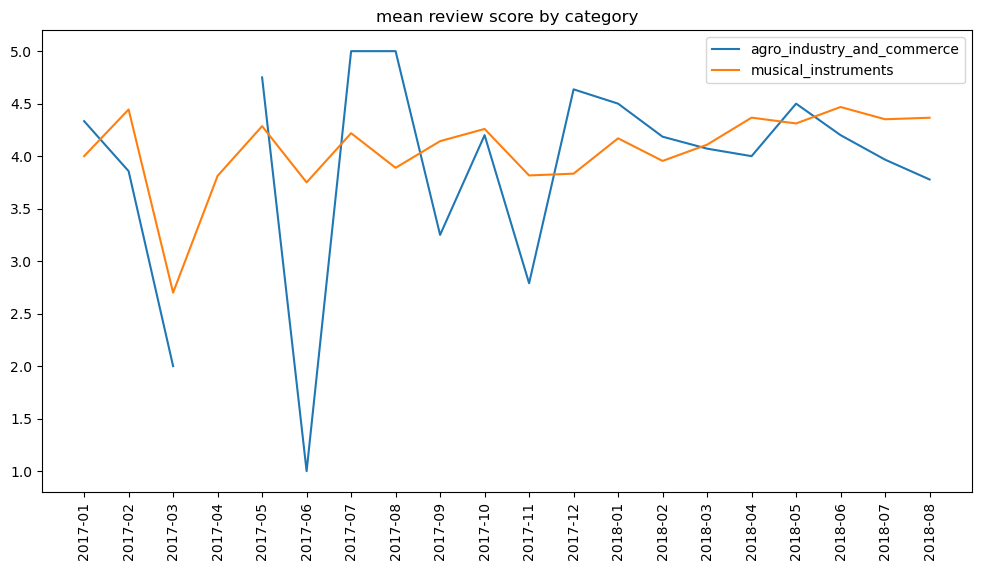

In [336]:

category_concern_price= ['agro_industry_and_commerce', 'musical_instruments']

time_multiples(order_item_pro_cate_review, 'm_y_purchase', 'review_score', 'product_category_name_english', category_concern_price, 'mean', 'mean review score by category')

### Review score with the highest quantity categories

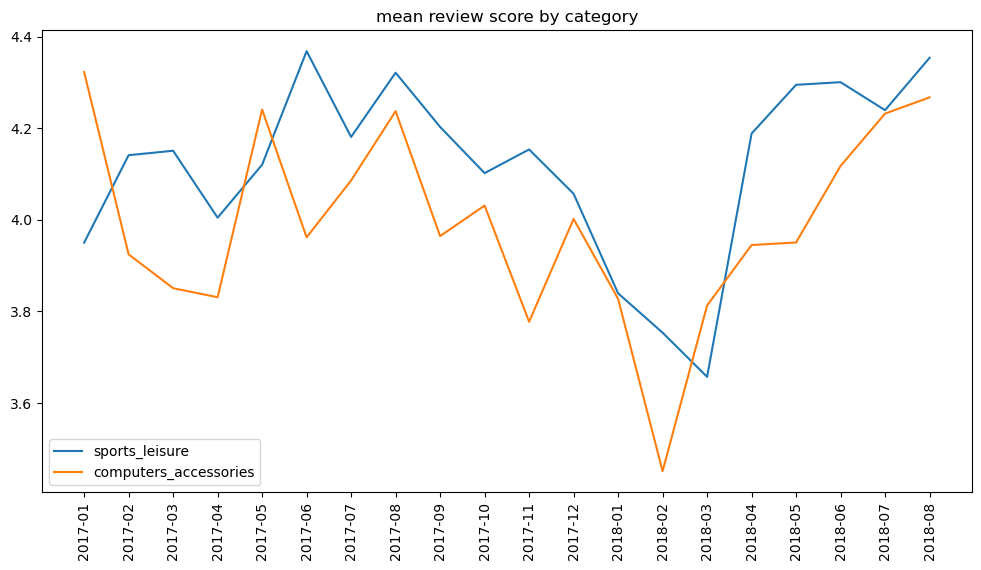

In [337]:

category_concern_quantity= [ 'sports_leisure', 'computers_accessories']

time_multiples(order_item_pro_cate_review, 'm_y_purchase', 'review_score', 'product_category_name_english', category_concern_quantity, 'mean', 'mean review score by category')

## order duration from order create to delivered per month

In [338]:
#duration between delivered & purchased
order['duration_delivered_purchase']=order.order_delivered_customer_date - order.order_purchase_timestamp

# Extract the total duration in seconds
order['duration_delivered_purchase'] = order['duration_delivered_purchase'].dt.total_seconds()

#convert the duration to days (1 day 24 hours, 1 hour 60 minutes, 1 minute 60 seconds)
order['duration_delivered_purchase'] = order['duration_delivered_purchase'] / (24 * 60 * 60)

#filter only orders delivered
delivered_order=order.query("order_status=='delivered'")

#calculate mean duration by month
delivered_groupby=delivered_order.groupby('m_y_purchase')['duration_delivered_purchase'].mean().reset_index()
delivered_groupby

,m_y_purchase,duration_delivered_purchase
0,2017-01,12.647044
1,2017-02,13.168825
2,2017-03,12.951184
3,2017-04,14.917913
4,2017-05,11.322363
5,2017-06,12.011573
6,2017-07,11.592732
7,2017-08,11.147125
8,2017-09,11.851007
9,2017-10,11.856700


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


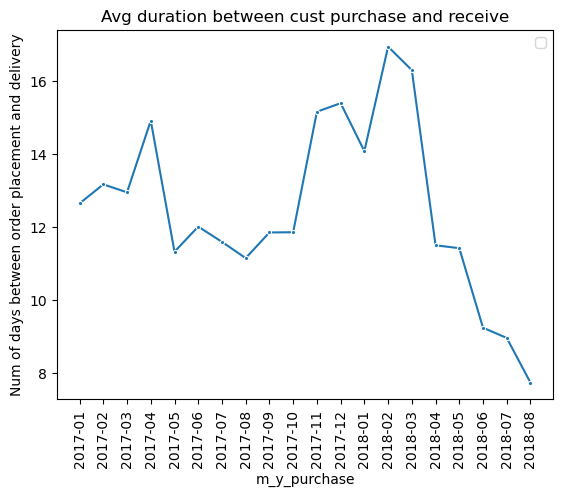

In [339]:
lineplot(delivered_groupby,'m_y_purchase','duration_delivered_purchase','Avg duration between cust purchase and receive', 'Num of days between order placement and delivery')

## Num voucher used

In [340]:
#filter only orders paid with voucher
voucher= payment.query("payment_type == 'voucher'")

#count the number of voucher for each 1 order
voucher_group= voucher.groupby('order_id')['payment_type'].count().reset_index(name='voucher_num')

#merge voucher with order_item_pro_cate to have category
voucher_cate= voucher_group.merge(order_item_pro_cate, how='inner', on='order_id')

print(voucher_group.shape[0])
print(order_item_pro_cate.shape[0])
print(voucher_cate.shape[0])

voucher_cate.head(1)

3866
113018
4213


,order_id,voucher_num,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,m_y_purchase,order_item_id,product_id,shipping_limit_date,price,product_category_name_english
0,0016dfedd97fc2950e388d2971d718c7,1,2c8b917c5d7dd720ebe36a5ed3b501ec,delivered,2017-04-28 19:54:40,2017-04-29 10:05:12,2017-05-16 08:40:49,2017-05-22 18:32:21,2017-06-01,2017-04,1.0,4089861a1bd4685da70bddd6b4f974f1,2017-05-05 10:05:12,49.75,garden_tools


In [341]:
voucher_cate.query("voucher_num > 1").sort_values('order_id')

,order_id,voucher_num,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,m_y_purchase,order_item_id,product_id,shipping_limit_date,price,product_category_name_english
1,002f19a65a2ddd70a090297872e6d64e,2,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,NaT,2018-04-16,2018-03,1.0,9eae06d51aaa383b2bed5547a19d581c,2018-03-27 13:15:27,53.98,bed_bath_table
3,0071ee2429bc1efdc43aa3e073a5290e,2,081a2d41949e652a50988fd39febb4a8,delivered,2018-01-22 11:08:15,2018-01-22 14:17:41,2018-01-26 15:12:17,2018-01-31 23:58:36,2018-02-15,2018-01,1.0,00ffe57f0110d73fd84d162252b2c784,2018-01-26 14:17:41,179.98,housewares
6,009ac365164f8e06f59d18a08045f6c4,5,7887f43daaa91055f85b6dd23cccdfcb,delivered,2017-11-23 00:03:52,2017-11-23 00:11:24,2017-11-23 15:16:58,2017-11-29 16:33:25,2017-12-13,2017-11,1.0,35557c68a22ecebcf066e25ca2ddc144,2017-11-29 00:11:24,16.90,garden_tools
8,00bd50cdd31bd22e9081e6e2d5b3577b,2,1e47b918581b562a9d8d9f85fcb9b1e5,delivered,2018-01-14 22:31:54,2018-01-15 09:56:33,2018-01-15 19:43:56,2018-01-22 16:03:40,2018-01-30,2018-01,1.0,e70f7c188cd2c0f01a1f6b35411cc481,2018-01-19 09:56:33,78.00,watches_gifts
9,00c405bd71187154a7846862f585a9d4,6,1ab52508d3c58d96241850142347b75f,delivered,2017-10-23 14:59:46,2017-10-23 15:14:13,2017-10-25 13:30:02,2017-10-31 18:47:06,2017-11-17,2017-10,1.0,c4cf7c2e1f190d51517eba7e8211c8e6,2017-10-27 15:14:13,29.90,health_beauty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4201,fefbe15ebcd87ab3fb8577e635a8b31c,5,d3b38af3b96edca0fb37ce0da53bfd3c,delivered,2018-03-08 21:11:34,2018-03-08 21:28:16,2018-03-19 19:11:47,2018-03-20 20:14:01,2018-03-20,2018-03,1.0,380db7678ce8fd2e3c80de130bc32fbd,2018-03-14 21:28:16,19.90,housewares
4207,ff1f8f328e5a59ac754240b6dd31bcb4,3,ba53e87622e90e0a905d871c0c8d53af,delivered,2017-08-10 16:07:21,2017-08-10 16:25:17,2017-08-14 20:59:59,2017-08-19 14:17:43,2017-08-30,2017-08,3.0,e7a6f33d382bca6fa19f52ff13e440bd,2017-08-16 16:25:17,74.00,bed_bath_table
4205,ff1f8f328e5a59ac754240b6dd31bcb4,3,ba53e87622e90e0a905d871c0c8d53af,delivered,2017-08-10 16:07:21,2017-08-10 16:25:17,2017-08-14 20:59:59,2017-08-19 14:17:43,2017-08-30,2017-08,1.0,e7a6f33d382bca6fa19f52ff13e440bd,2017-08-16 16:25:17,74.00,bed_bath_table
4206,ff1f8f328e5a59ac754240b6dd31bcb4,3,ba53e87622e90e0a905d871c0c8d53af,delivered,2017-08-10 16:07:21,2017-08-10 16:25:17,2017-08-14 20:59:59,2017-08-19 14:17:43,2017-08-30,2017-08,2.0,e7a6f33d382bca6fa19f52ff13e440bd,2017-08-16 16:25:17,74.00,bed_bath_table


item_pro_cate: 1 order may have multiple products with different category
-> merged with voucher_group, assuming all categories in 1 order are bought with voucher

#### Num of vouchers used by categories with the highest price

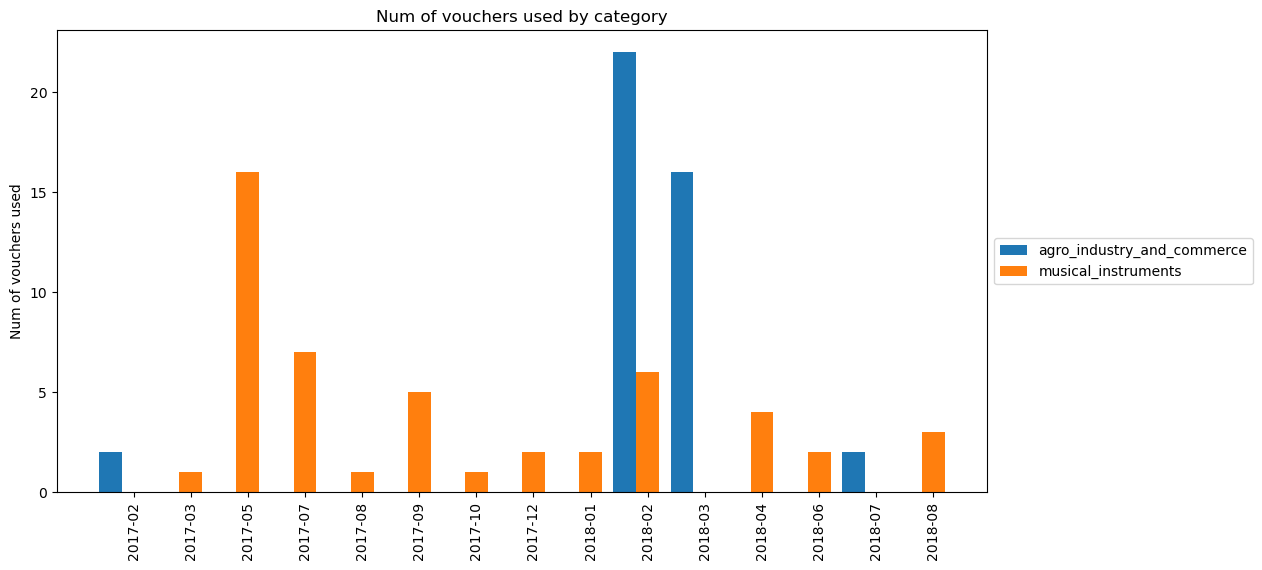

In [342]:
voucher_list_price= voucher_cate[voucher_cate.product_category_name_english.isin(category_concern_price)]

bar_multiple_category(voucher_list_price, 'm_y_purchase', 'product_category_name_english', 'voucher_num', 'sum', 'Num of vouchers used by category', 'Num of vouchers used')

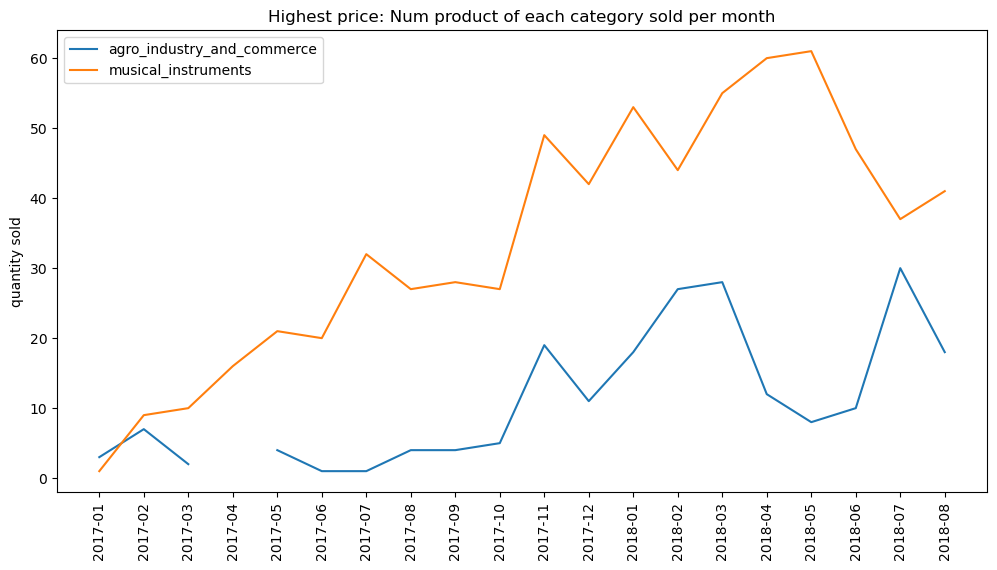

In [343]:
category_concern_price= ['agro_industry_and_commerce', 'musical_instruments']
time_multiples(order_item_pro_cate,'m_y_purchase','product_category_name_english','product_category_name_english',category_concern_price,'count','Highest price: Num product of each category sold per month', 'quantity sold')

#### Num of vouchers used by categories with the highest quantity sold

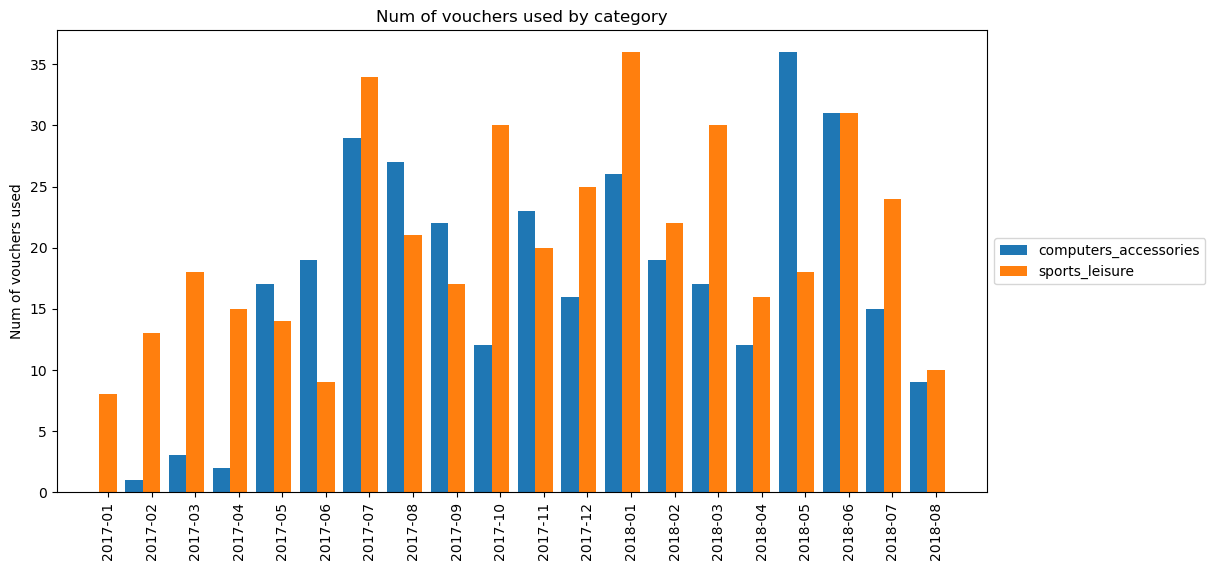

In [344]:
voucher_list_quantity= voucher_cate[voucher_cate.product_category_name_english.isin(category_concern_quantity)]

bar_multiple_category(voucher_list_quantity, 'm_y_purchase', 'product_category_name_english', 'voucher_num', 'sum', 'Num of vouchers used by category', 'Num of vouchers used')

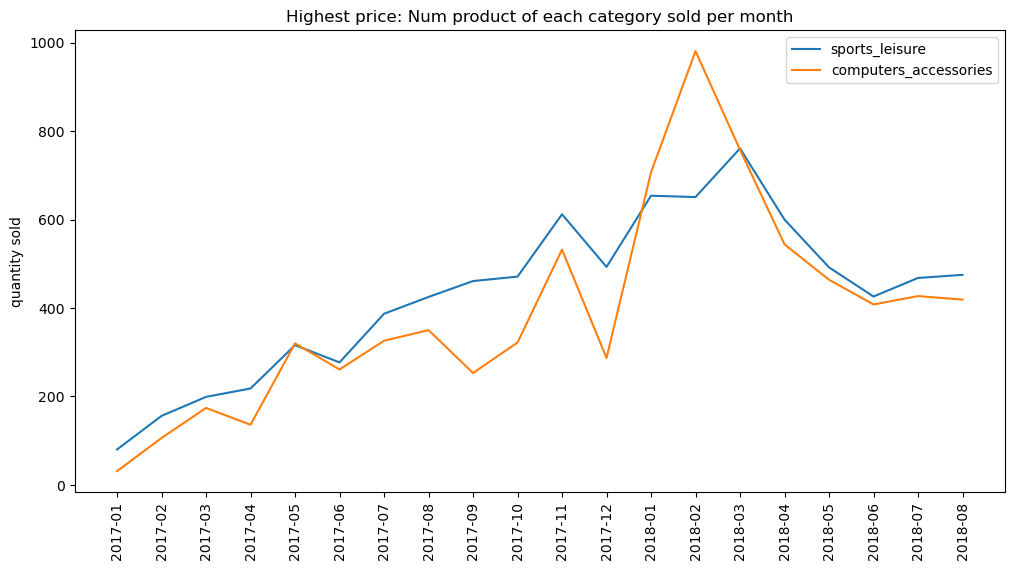

In [345]:
category_concern_quantity= [ 'sports_leisure', 'computers_accessories']
time_multiples(order_item_pro_cate,'m_y_purchase','product_category_name_english','product_category_name_english',category_concern_quantity,'count','Highest price: Num product of each category sold per month', 'quantity sold')

## Num of product sold by state

In [346]:
#merge customer with order_item_pro_cate to identify with state shows a decline
state_cate= order_item_pro_cate.merge(customer, how='left', on='customer_id')
state_cate= state_cate[state_cate.order_status.isin(['delivered'])]
print(order_item_pro_cate.shape)
print(customer.shape)
print('')
data_summary(state_cate)

(113018, 14)
(99441, 5)

Dataset Shape: (109880, 18)
Num of complete duplicates: 0


,Name,dtypes,Missing,Uniques,Count_value,mean,std,25%,50%,75%,max
1,order_id,object,0,96211,109880,NaN,NaN,NaN,NaN,NaN,NaN
2,customer_id,object,0,96211,109880,NaN,NaN,NaN,NaN,NaN,NaN
3,order_status,object,0,1,109880,NaN,NaN,NaN,NaN,NaN,NaN
4,order_purchase_timestamp,datetime64[ns],0,95689,109880,NaN,NaN,NaN,NaN,NaN,NaN
5,order_approved_at,datetime64[ns],15,88008,109865,NaN,NaN,NaN,NaN,NaN,NaN
6,order_delivered_carrier_date,datetime64[ns],2,79851,109878,NaN,NaN,NaN,NaN,NaN,NaN
7,order_delivered_customer_date,datetime64[ns],8,95393,109872,NaN,NaN,NaN,NaN,NaN,NaN
8,order_estimated_delivery_date,datetime64[ns],0,420,109880,NaN,NaN,NaN,NaN,NaN,NaN
9,m_y_purchase,object,0,20,109880,NaN,NaN,NaN,NaN,NaN,NaN
10,order_item_id,float64,0,21,109880,1.197961,0.706466,1.0,1.0,1.00,21.0


### Num of musical instrument sold by state

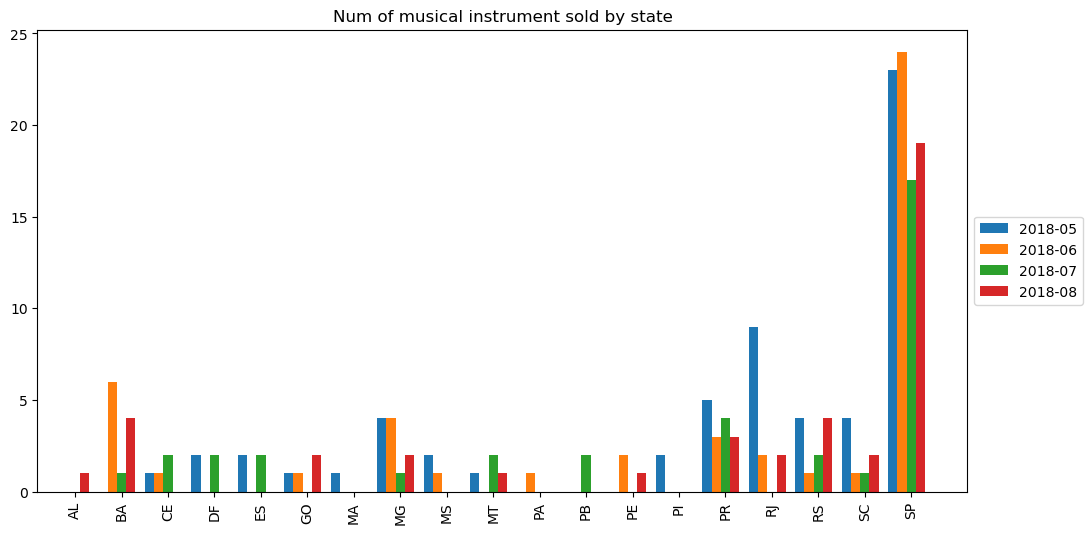

In [347]:
#filter musical instrument
state_cate_musical= state_cate[state_cate.product_category_name_english.isin(['musical_instruments']) ]

#filter time when musical instruments witnessed a dramatic decline
state_cate_musical= state_cate_musical.query("order_purchase_timestamp >= '2018-05-01' ")

bar_multiple_category(state_cate_musical, 'customer_state', 'm_y_purchase','product_id', 'count', 'Num of musical instrument sold by state')

In [348]:
state_cate_musical.groupby('m_y_purchase')['product_id'].count()

m_y_purchase
2018-05    61
2018-06    47
2018-07    36
2018-08    41
Name: product_id, dtype: int64

### Num of argo sold by state

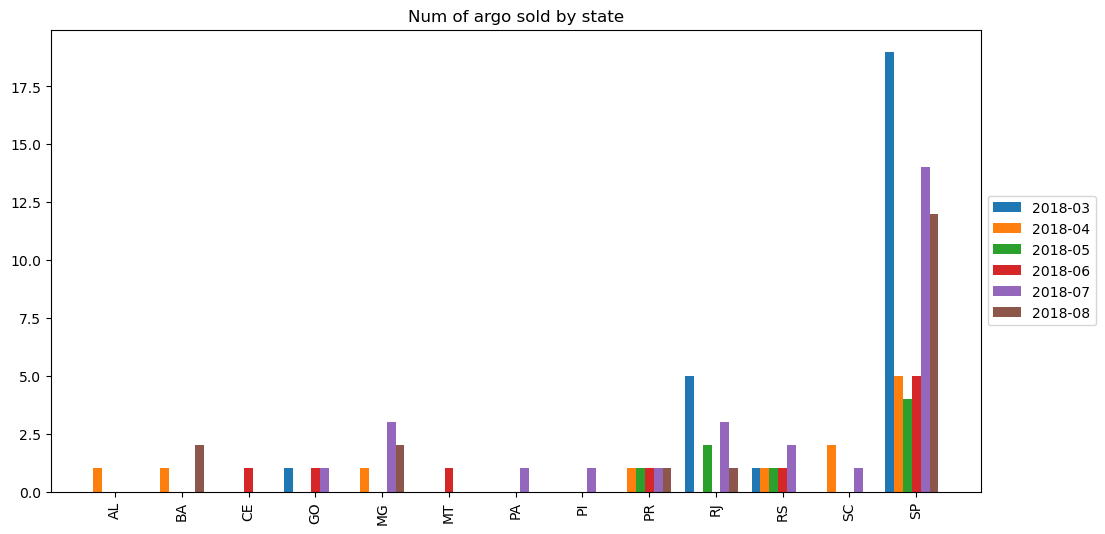

In [349]:
#filter argo
state_cate_argo= state_cate[state_cate.product_category_name_english.isin(['agro_industry_and_commerce']) ]

#filter time when argo witnessed a dramatic decline
state_cate_argo= state_cate_argo.query("order_purchase_timestamp >= '2018-03-01' ")

bar_multiple_category(state_cate_argo, 'customer_state', 'm_y_purchase','product_id', 'count', 'Num of argo sold by state')

In [350]:
state_cate_argo.groupby('m_y_purchase')['product_id'].count()

m_y_purchase
2018-03    26
2018-04    12
2018-05     8
2018-06    10
2018-07    27
2018-08    18
Name: product_id, dtype: int64

### Num of sport sold by state

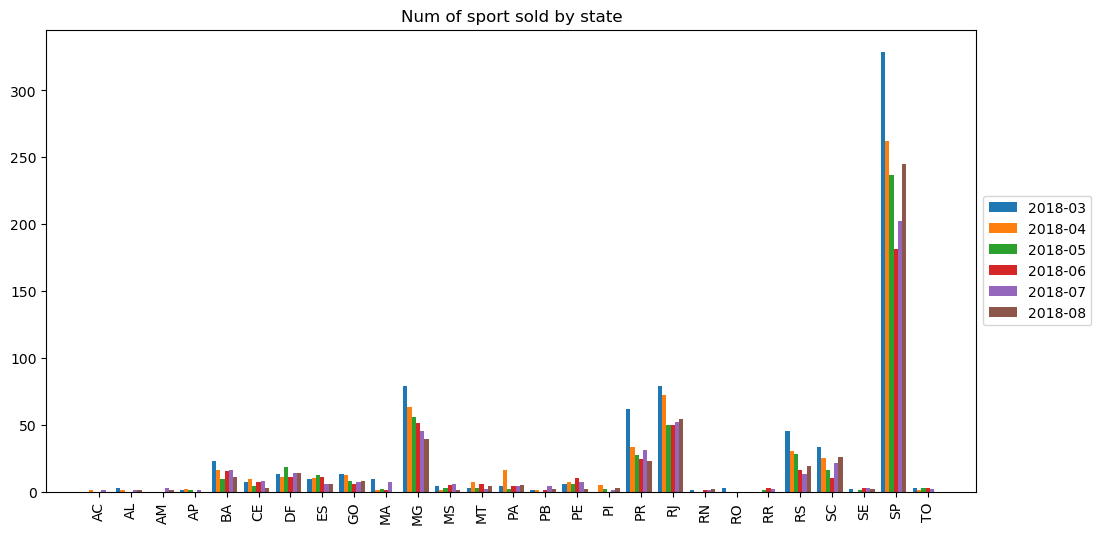

In [351]:
#filter sport
state_cate_argo= state_cate[state_cate.product_category_name_english.isin(['sports_leisure']) ]

#filter time when sport witnessed a dramatic decline
state_cate_argo= state_cate_argo.query("order_purchase_timestamp >= '2018-03-01' ")

bar_multiple_category(state_cate_argo, 'customer_state', 'm_y_purchase','product_id', 'count', 'Num of sport sold by state')

### Num of comp_accessories sold by state

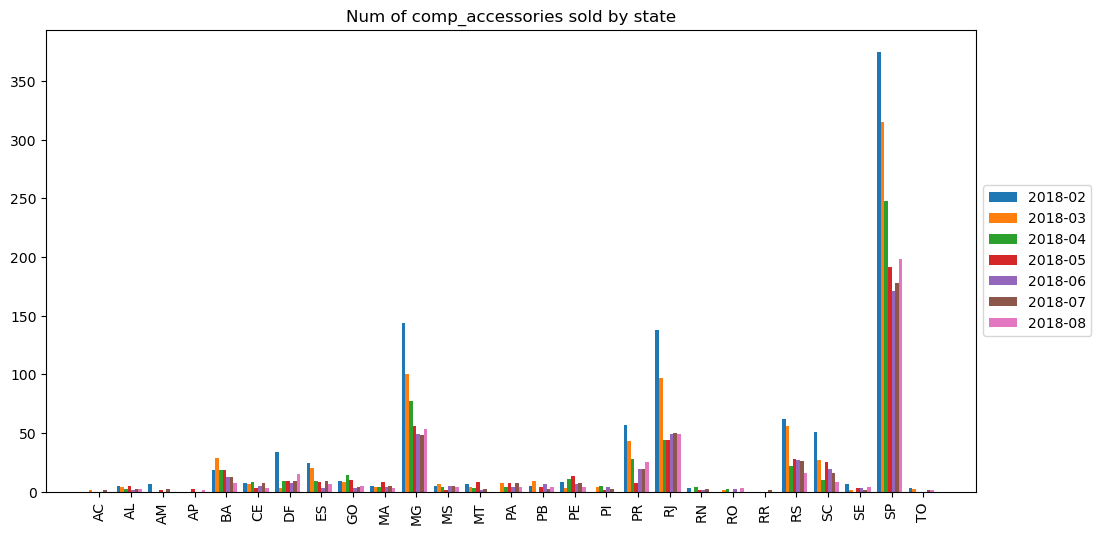

In [352]:
#filter comp_accessories
state_cate_argo= state_cate[state_cate.product_category_name_english.isin(['computers_accessories']) ]

#filter time when comp_accessories witnessed a dramatic decline
state_cate_argo= state_cate_argo.query("order_purchase_timestamp >= '2018-02-01' ")

bar_multiple_category(state_cate_argo, 'customer_state', 'm_y_purchase','product_id', 'count', 'Num of comp_accessories sold by state')

## Distribution of sellers/buyers by state

In [353]:
#count number of seller by state
seller_group= seller.groupby('seller_state')['seller_id'].count().reset_index(name='value').rename(columns={'seller_state':'state'})

#create a % contribution column for each state to compare with customer proportion
seller_group['% contribution nationwide']= seller_group.value / seller_group.value.sum() * 100

#create a type column
seller_group['types']= 'seller'

'---------------'

#count number of customer by state
customer_group= customer.groupby('customer_state')['customer_id'].count().reset_index(name='value').rename(columns={'customer_state':'state'})

#create a % contribution column for each state to compare with seller proportion
customer_group['% contribution nationwide']= customer_group.value / customer_group.value.sum() * 100

#create a type column
customer_group['types']= 'customer'

#concate seller & customer
seller_buyer= pd.concat([seller_group, customer_group])

print("seller state num:", seller_group.shape[0])
print("customer state num:", customer_group.shape[0])
print("seller buyer state num:", seller_buyer.shape[0])

seller_buyer.head(1)

seller state num: 23
customer state num: 27
seller buyer state num: 50


,state,value,% contribution nationwide,types
0,AC,1,0.03231,seller


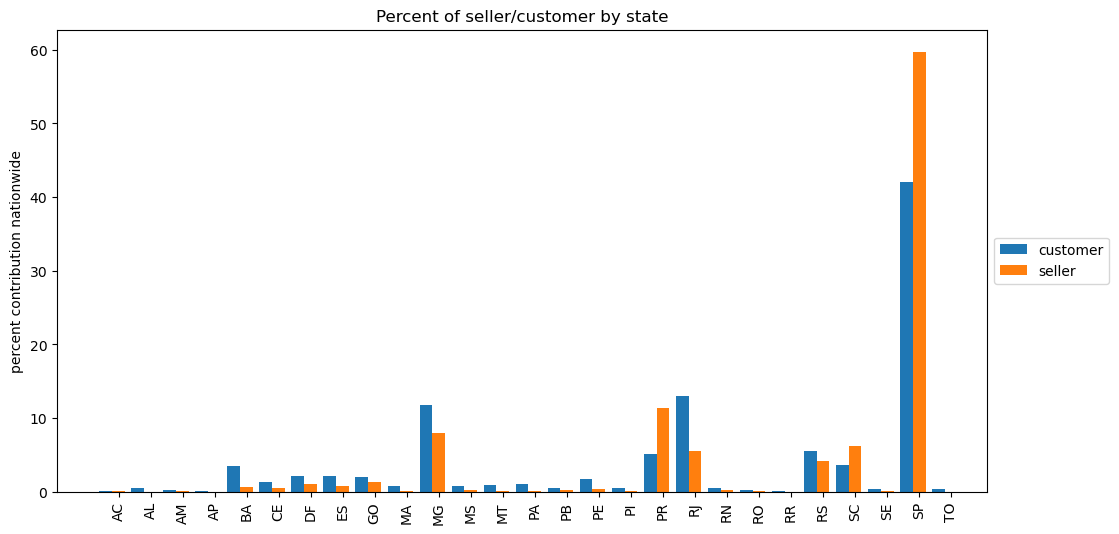

In [354]:
bar_multiple_category(seller_buyer, 'state', 'types','% contribution nationwide', 'mean', 'Percent of seller/customer by state', 'percent contribution nationwide')

## GMV & seller buyer ratio by state

### seller_buyer_ratio

In [374]:
#merge customer_group & seller_group
seller_buyer_ratio= customer_group.merge(seller_group, how='left', on='state', suffixes=['_customer','_seller'])

#create sell_cust_ratio column
seller_buyer_ratio['sell_cust_ratio']= seller_buyer_ratio.value_seller / seller_buyer_ratio.value_customer 

#filter columns & fillna as 0 (0= no seller)
seller_buyer_ratio_state= seller_buyer_ratio.loc[:, ['state', 'sell_cust_ratio']].fillna(0)
seller_buyer_ratio_state

,state,sell_cust_ratio
0,AC,0.012346
1,AL,0.000000
2,AM,0.006757
3,AP,0.000000
4,BA,0.005621
5,CE,0.009731
6,DF,0.014019
7,ES,0.011313
8,GO,0.019802
9,MA,0.001339


### GMV by state

In [379]:
#merge order_itemgroup & customer to find states for each order
orderitemgroup_customer= order_itemgroup.merge(customer, how='inner', on='customer_id') \
                .assign(year= lambda x: x.m_y_purchase.str[:4]) #create a year column 

#calculate total GMV for each state
GMV_state= orderitemgroup_customer.groupby('customer_state').agg({'order_value':'sum'}).reset_index().assign(log_gmv= lambda x: np.log(x.order_value) )
GMV_state

,customer_state,order_value,log_gmv
0,AC,15982.95,9.679278
1,AL,80232.32,11.292682
2,AM,22356.84,10.014888
3,AP,13474.30,9.508539
4,BA,510455.94,13.143060
5,CE,225565.33,12.326365
6,DF,301560.17,12.616725
7,ES,274119.52,12.521319
8,GO,293607.56,12.589999
9,MA,118943.96,11.686408


Text(0.5, 0, 'logarithm of gmv')

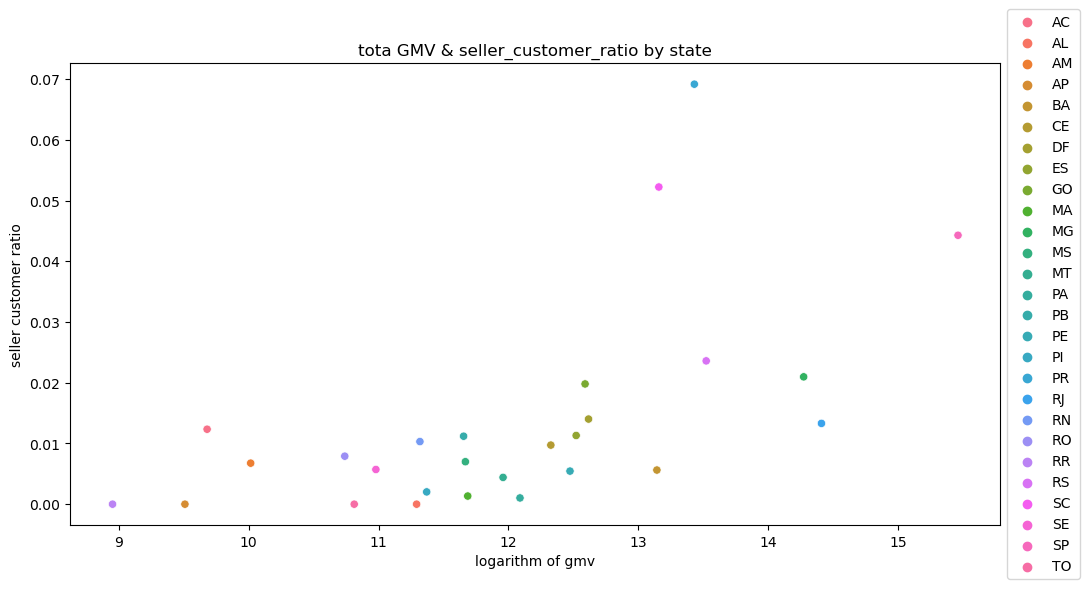

In [389]:
#merge seller_buyer_ratio_state & GMV_state
seller_buyer_ratio_GMV_state= seller_buyer_ratio_state.merge(GMV_state, how='inner', left_on='state', right_on='customer_state')

plt.figure(figsize=(12, 6))
sns.scatterplot(data=seller_buyer_ratio_GMV_state, x='log_gmv', y='sell_cust_ratio', hue='state')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('tota GMV & seller_customer_ratio by state')
plt.ylabel('seller customer ratio')
plt.xlabel('logarithm of gmv')
